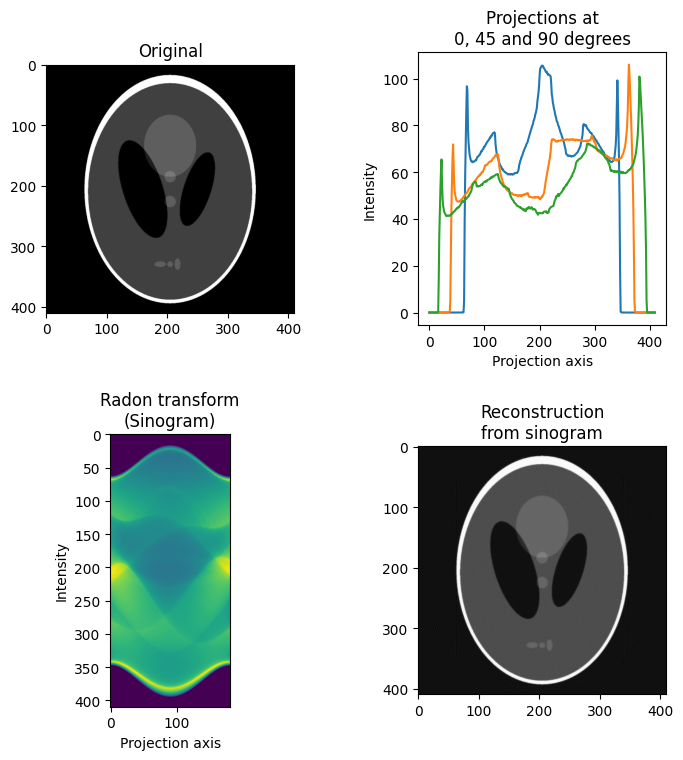

In [2]:
import matplotlib.pyplot as plt
from skimage.io import imread
# from skimage import data_dir
from skimage.transform import radon, iradon, rescale
image = imread("./tomograf-zdjecia/Shepp_logan.jpg", as_gray=True)
image = rescale(image, scale=0.4)
plt.figure(figsize=(8, 8.5))
plt.subplot(221)
plt.title("Original")
plt.imshow(image, cmap=plt.cm.Greys_r)
plt.subplot(222)
projections = radon(image, theta=[0, 45, 90])
plt.plot(projections)
plt.title("Projections at\n0, 45 and 90 degrees")
plt.xlabel("Projection axis")
plt.ylabel("Intensity")
projections = radon(image)
plt.subplot(223)
plt.title("Radon transform\n(Sinogram)")
plt.xlabel("Projection axis")
plt.ylabel("Intensity")
plt.imshow(projections)
reconstruction = iradon(projections)
plt.subplot(224)
plt.title("Reconstruction\nfrom sinogram")
plt.imshow(reconstruction, cmap=plt.cm.Greys_r)
plt.subplots_adjust(hspace=0.4, wspace=0.5)
plt.show()

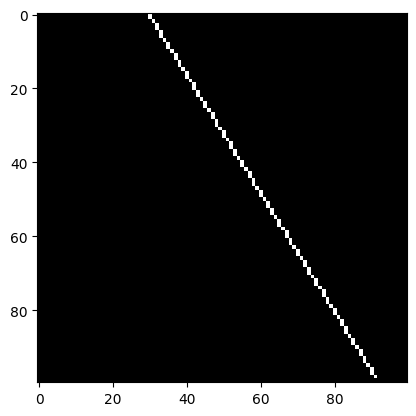

In [5]:
from helpers.image_exec import bresenhams_line
import numpy as np
import matplotlib.pyplot as plt

img = np.zeros((100, 100))

points = bresenhams_line((-50, -1), (99, 92), 100, 100)

for (x,y) in points:
  img[x,y] = 1

plt.imshow(img, 'gray')


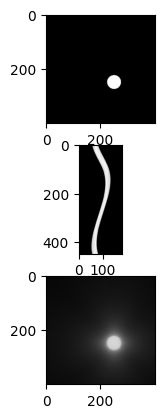

In [7]:
import cv2
from skimage.draw import line_nd
import numpy as np
import matplotlib.pyplot as plt
import time
from helpers.image_exec import ImageExec
import math
from ipywidgets import interact
from copy import deepcopy
# from skimage import io

# img = io.imread("./tomograf-zdjecia/Shepp_logan.jpg", as_gray=True)

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

_, (plt1, plt2, plt3) = plt.subplots(3)

img = plt.imread("./tomograf-zdjecia/Kropka.jpg")
img_height, img_width, _ = np.shape(img)
img = rgb2gray(img)
# plt.subplot(1,2,1)
plt1.imshow(img, 'gray')


image = np.asarray(img)
pxs = img_height

im = ImageExec(image)

sr = int(pxs / 2)
r = int(sr * math.sqrt(2))

sinogram = list()

detectors_num = 180

E = []
D = []
for x in np.arange(0, 360, 0.8):
    # im.clear_image()
    alpha = math.radians(x)
    fi = math.radians(180)

    E_x = int(r * math.cos(alpha)) + sr
    E_y = int(r * math.sin(alpha)) + sr
    E.append((E_x, E_y))
    D.append([])

    detectors = list()

    for i in range(detectors_num):
        D_x = int(r * math.cos(alpha + math.pi - fi / 2 + i * (fi / (detectors_num - 1)))) + sr
        D_y = int(r * math.sin(alpha + math.pi - fi / 2 + i * (fi / (detectors_num - 1)))) + sr
        _, _, val = im.calc_bresenham_line((E_x,E_y),(D_x,D_y))
        D[-1].append((D_x, D_y))
        detectors.append(val)

    sinogram.append((alpha, detectors))

# plt.subplot(1,2,2)
plt2.imshow([x[1] for x in sinogram], 'gray')

sinogram = [x[1] for x in sinogram]

# Back projection
backprojected_img = np.zeros((img_height, img_width))

for i in range(len(sinogram)):

    for j in range(detectors_num):
        line_x_points, line_y_points = line_nd(E[i], D[i][j])
        for (x, y) in zip(line_x_points, line_y_points):
            if x >= 0 and y < img_height and y >= 0 and x < img_width:
                backprojected_img[y][x] += sinogram[i][j]


plt3.imshow(backprojected_img, 'gray')